In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
df = pd.read_csv("DataCoSupplyChainDataset.csv", encoding='ISO-8859-1')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 53 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   ï»¿Type                        180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category Id                    180519 non-null  int64  
 8   Category Name                  180519 non-null  object 
 9   Customer City                  180519 non-null  object 
 10  Customer Country               180519 non-null  object 
 11  Customer Email                 180519 non-null  object 
 12  Customer Fname                

In [4]:
df.sample(5)

,ï»¿Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
134816,TRANSFER,5,4,100.790001,287.980011,Late delivery,1,43,Camping & Hiking,Saint Paul,...,19140.0,957,43,NaN,http://images.acmesports.sports/Diamondback+Wo...,Diamondback Women's Serene Classic Comfort Bi,299.980011,0,8/20/16 6:31,Standard Class
128716,DEBIT,6,4,28.549999,101.970001,Late delivery,1,26,Girls' Apparel,Florissant,...,NaN,572,26,NaN,http://images.acmesports.sports/TYR+Boys%27+Te...,TYR Boys' Team Digi Jammer,39.990002,0,9/29/15 12:25,Standard Class
160886,TRANSFER,4,4,5.760000,50.990002,Shipping on time,0,17,Cleats,Caguas,...,94122.0,365,17,NaN,http://images.acmesports.sports/Perfect+Fitnes...,Perfect Fitness Perfect Rip Deck,59.990002,0,7/24/16 10:04,Standard Class
12822,DEBIT,3,4,10.440000,52.189999,Advance shipping,0,17,Cleats,Caguas,...,NaN,365,17,NaN,http://images.acmesports.sports/Perfect+Fitnes...,Perfect Fitness Perfect Rip Deck,59.990002,0,6/16/15 12:12,Standard Class
26812,DEBIT,2,1,-5.820000,116.379997,Late delivery,1,17,Cleats,Caguas,...,NaN,365,17,NaN,http://images.acmesports.sports/Perfect+Fitnes...,Perfect Fitness Perfect Rip Deck,59.990002,0,10/20/16 8:32,First Class


In [5]:
df.columns

Index(['ï»¿Type', 'Days for shipping (real)', 'Days for shipment (scheduled)',
       'Benefit per order', 'Sales per customer', 'Delivery Status',
       'Late_delivery_risk', 'Category Id', 'Category Name', 'Customer City',
       'Customer Country', 'Customer Email', 'Customer Fname', 'Customer Id',
       'Customer Lname', 'Customer Password', 'Customer Segment',
       'Customer State', 'Customer Street', 'Customer Zipcode',
       'Department Id', 'Department Name', 'Latitude', 'Longitude', 'Market',
       'Order City', 'Order Country', 'Order Customer Id',
       'order date (DateOrders)', 'Order Id', 'Order Item Cardprod Id',
       'Order Item Discount', 'Order Item Discount Rate', 'Order Item Id',
       'Order Item Product Price', 'Order Item Profit Ratio',
       'Order Item Quantity', 'Sales', 'Order Item Total',
       'Order Profit Per Order', 'Order Region', 'Order State', 'Order Status',
       'Order Zipcode', 'Product Card Id', 'Product Category Id',
       'Product

In [6]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')


In [7]:
df_eda = df[[
    'order_customer_id',
    'order_item_id',
    'order_item_total',
    'sales',
    'order_id',
    'order_item_quantity',
    'order_profit_per_order',
    'order_item_product_price',
    'order_date_dateorders'
]].dropna(subset=['order_customer_id', 'order_date_dateorders'])

In [8]:
df_eda['order_date_dateorders'] = pd.to_datetime(df_eda['order_date_dateorders'], errors='coerce')

<ipython-input-8-9d6d263cc79d>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_eda['order_date_dateorders'] = pd.to_datetime(df_eda['order_date_dateorders'], errors='coerce')


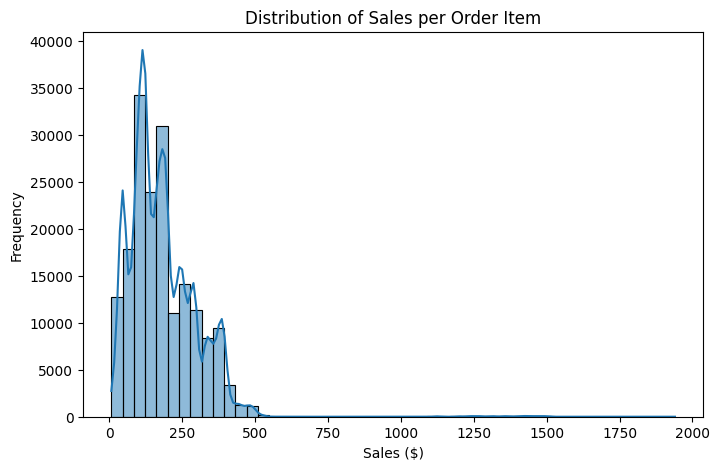

In [9]:
plt.figure(figsize=(8,5))
sns.histplot(df_eda['order_item_total'], bins=50, kde=True)
plt.title('Distribution of Sales per Order Item')
plt.xlabel('Sales ($)')
plt.ylabel('Frequency')
plt.show()


The distribution of sales per order item is right-skewed, with most transactions occurring between \$0 and \$300.  
This indicates that the majority of customers make low to mid-range purchases, which is typical in retail datasets.


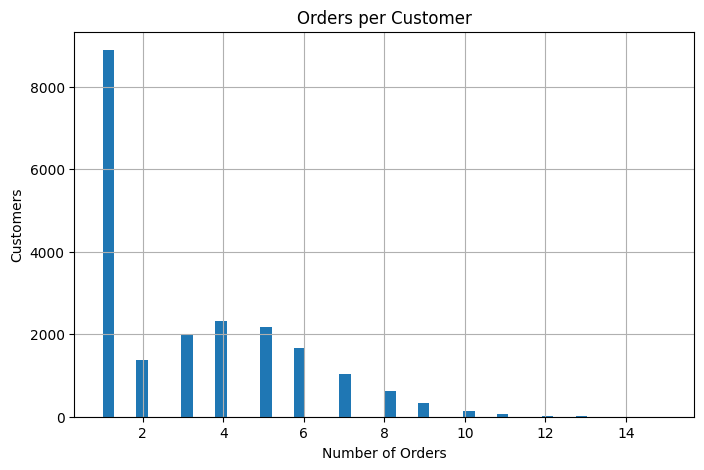

In [10]:
orders_per_customer = df_eda.groupby('order_customer_id')['order_id'].nunique()
orders_per_customer.hist(bins=50, figsize=(8,5))
plt.title('Orders per Customer')
plt.xlabel('Number of Orders')
plt.ylabel('Customers')
plt.show()

The state-wise map reveals a concentration of customers in specific U.S. states, with notable peaks in states like Montana.  
This regional disparity highlights potential high-performing zones for targeted marketing and customer retention strategies.


In [11]:
df['customer_state'].value_counts()

,count
customer_state,
PR,69373
CA,29223
NY,11327
TX,9103
IL,7631
FL,5456
OH,4095
PA,3824
MI,3804


In [12]:
valid_states = {
    'AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA', 'HI', 'ID', 'IL', 'IN', 'IA', 'KS',
    'KY', 'LA', 'ME', 'MD', 'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY',
    'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 'WV',
    'WI', 'WY'
}


In [13]:
df_usa = df[df['customer_state'].isin(valid_states)]

In [14]:
state_counts = df_usa['customer_state'].value_counts().reset_index()
state_counts.columns = ['state', 'count']

import plotly.express as px
import plotly.graph_objects as go

fig = px.choropleth(
    state_counts,
    locations='state',
    locationmode='USA-states',
    color='count',
    scope='usa',
    color_continuous_scale='Plasma',
    title='Cleaned Customer Distribution by State'
)
fig.show()


![Customer Map](image.png)


The cleaned U.S. choropleth map accurately reflects customer distribution by valid state codes, with California leading significantly.  
This visualization helps identify geographically concentrated customer bases, which is key for region-specific strategies.


## Data Preparation RFM Analysis

✅ **Goal**:  
Create an RFM table with the following metrics for each customer:

- **Recency**: Days since the customer's last purchase  
- **Frequency**: Total number of purchases made  
- **Monetary**: Total amount spent by the customer


In [15]:
df['order_date_dateorders'] = pd.to_datetime(df['order_date_dateorders'], errors='coerce')


<ipython-input-15-196b3c63427c>:1: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



In [16]:
df_clean = df.dropna(subset=['order_customer_id', 'order_date_dateorders'])

In [17]:
# Set reference date for "Recency" (can be the max order date in dataset)
reference_date = df_clean['order_date_dateorders'].max()

In [18]:
# Group by customer to compute RFM
rfm = df_clean.groupby('order_customer_id').agg({
    'order_date_dateorders': lambda x: (reference_date - x.max()).days,  # Recency
    'order_id': 'nunique',                                               # Frequency
    'order_item_total': 'sum'                                            # Monetary
}).reset_index()

In [19]:
rfm.columns = ['customer_id', 'recency', 'frequency', 'monetary']

In [20]:
#Remove negative/zero monetary customers (if any)
rfm = rfm[rfm['monetary'] > 0]

In [21]:
rfm

,customer_id,recency,frequency,monetary
0,1,792,1,472.450012
1,2,136,4,1618.660042
2,3,229,5,3189.200037
3,4,380,4,1480.709993
4,5,457,3,1101.919998
...,...,...,...,...
20647,20753,0,1,161.869995
20648,20754,0,1,172.660004
20649,20755,0,1,314.640015
20650,20756,0,1,10.910000


In [22]:
rfm.to_csv('customer_segmentation_rfm.csv', index=False)

In [ ]:
rfm[['recency', 'frequency', 'monetary']].describe()


,recency,frequency,monetary
count,20652.000000,20652.000000,20652.000000
mean,220.089144,3.183808,1600.542436
std,199.395441,2.430699,1508.417956
min,0.000000,1.000000,8.470000
25%,75.000000,1.000000,254.940002
50%,159.000000,3.000000,1294.504997
75%,307.000000,5.000000,2621.140007
max,1125.000000,15.000000,9436.610088


### 📊 RFM Summary Insights

- The **average recency** is approximately **220 days**, with a minimum of 0 and a maximum of 1125 days, indicating a wide range of customer activity — from very recent to long-dormant users.
- **Frequency** is positively skewed, with most customers placing **3 or fewer orders**, and a few outliers placing up to 15 orders.
- The **monetary value** shows a substantial spread, with 75% of customers spending up to **\$2,621**, while a small high-spending segment reaches nearly **\$9,437**, emphasizing the presence of valuable VIP customers.


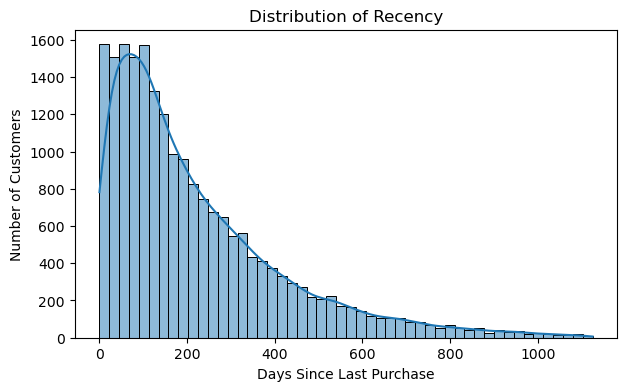

In [ ]:
plt.figure(figsize=(7, 4))
sns.histplot(rfm['recency'], bins=50, kde=True)
plt.title('Distribution of Recency')
plt.xlabel('Days Since Last Purchase')
plt.ylabel('Number of Customers')
plt.show()

- 🟦 The distribution of **recency** is right-skewed, indicating that most customers made purchases within the last 200 days, with fewer customers showing long inactivity.
- 🎯 This will help us distinguish **active vs. dormant customers**, enabling better targeting during segmentation and clustering.



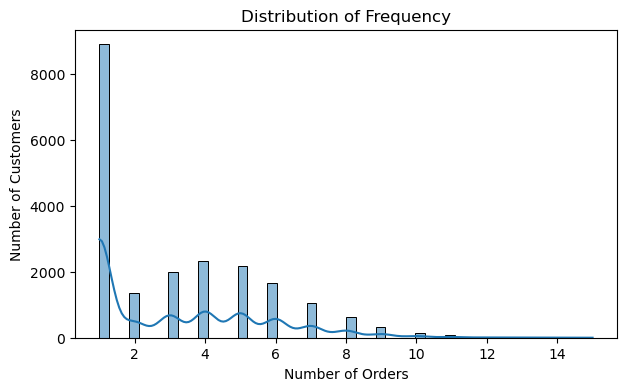

In [ ]:
plt.figure(figsize=(7, 4))
sns.histplot(rfm['frequency'], bins=50, kde=True)
plt.title('Distribution of Frequency')
plt.xlabel('Number of Orders')
plt.ylabel('Number of Customers')
plt.show()

- 🟦 The frequency distribution is highly right-skewed, with a majority of customers making only 1 to 3 purchases, and very few exceeding 10 orders.
- 🎯 This insight helps us identify **loyal vs. one-time buyers**, which is crucial for clustering and developing retention strategies.


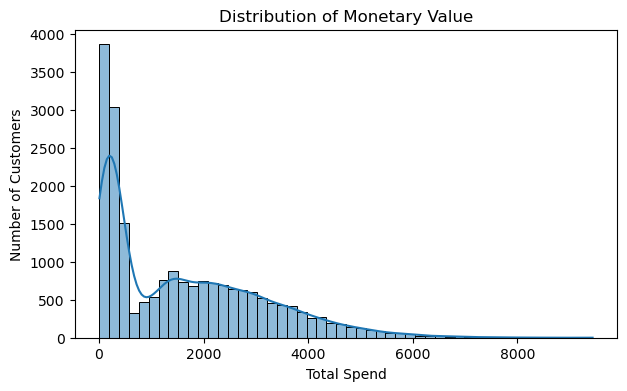

In [ ]:
plt.figure(figsize=(7, 4))
sns.histplot(rfm['monetary'], bins=50, kde=True)
plt.title('Distribution of Monetary Value')
plt.xlabel('Total Spend')
plt.ylabel('Number of Customers')
plt.show()

- 🟦 The monetary value distribution is long-tailed, with most customers spending below \$2,000 and a few high-value customers spending over \$8,000.
- 🎯 This insight helps identify **top spenders** who significantly impact revenue and can be prioritized for **VIP loyalty or personalized campaigns**.


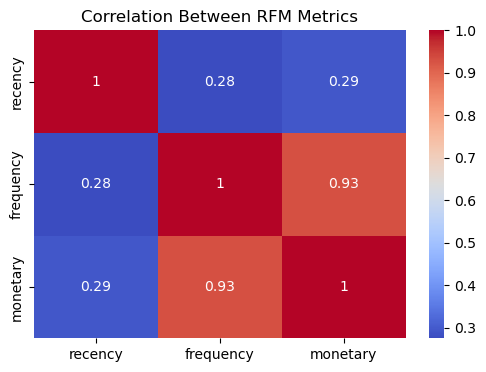

In [ ]:
plt.figure(figsize=(6, 4))
sns.heatmap(rfm[['recency', 'frequency', 'monetary']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Between RFM Metrics')
plt.show()

- 🟦 The correlation matrix reveals a **strong positive relationship** between frequency and monetary value (0.93), indicating that customers who order more tend to spend significantly more.
- 🎯 Recency shows a **weak positive correlation** with both frequency and monetary, suggesting that recent purchases don't always imply high frequency or spending — supporting the need for multidimensional segmentation.


In [ ]:
rfm.sort_values(by='monetary', ascending=False).head(10)

,customer_id,recency,frequency,monetary
782,791,127,13,9436.610088
8694,8766,134,11,8400.980107
9295,9371,147,11,8222.670103
2612,2641,177,11,8221.640130
4209,4249,166,13,8198.150069
1636,1657,238,11,8165.230023
3672,3710,180,14,8112.130127
5603,5654,122,15,7918.750080
5664,5715,186,12,7881.100092
1271,1288,254,12,7869.020065


- 🟦 The top 10 customers based on monetary value have each spent over \$7,800, with most placing **11–15 orders** and maintaining **moderate recency** (between 120–250 days).
- 🎯 These customers represent the **most profitable segment**, ideal for personalized retention efforts, loyalty programs, and premium service offerings.


In [ ]:
rfm['r_score'] = pd.qcut(rfm['recency'], 5, labels=[5, 4, 3, 2, 1])
rfm['f(_score'] = pd.qcutrfm['frequency'].rank(method='first'), 5, labels=[1, 2, 3, 4, 5])
rfm['m_score'] = pd.qcut(rfm['monetary'], 5, labels=[1, 2, 3, 4, 5])



In [ ]:
rfm['r_score'] = rfm['r_score'].astype(int)
rfm['f_score'] = rfm['f_score'].astype(int)
rfm['m_score'] = rfm['m_score'].astype(int)


In [ ]:
rfm

,customer_id,recency,frequency,monetary,r_score,f_score,m_score
0,1,792,1,472.450012,1,1,2
1,2,136,4,1618.660042,3,3,3
2,3,229,5,3189.200037,2,4,5
3,4,380,4,1480.709993,1,3,3
4,5,457,3,1101.919998,1,3,3
...,...,...,...,...,...,...,...
20647,20753,0,1,161.869995,5,3,1
20648,20754,0,1,172.660004,5,3,1
20649,20755,0,1,314.640015,5,3,2
20650,20756,0,1,10.910000,5,3,1


### 🧮 RFM Scoring and Segment Creation

To simplify and interpret customer behavior, we created three new columns:

- **`r_score`**: Based on recency — customers are ranked into 5 bins using `qcut`, with **lower recency (more recent)** getting **higher scores**.
- **`f_score`**: Based on frequency — higher number of purchases gets a **higher score** using quantile binning.
- **`m_score`**: Based on monetary value — customers who spent more receive a **higher score**, again using `qcut`.



In [ ]:
rfm['rfm_score_total'] = rfm[['r_score', 'f_score', 'm_score']].astype(int).sum(axis=1)

In [ ]:
def segment_customer(row):
    r, f, m = row['r_score'], row['f_score'], row['m_score']

    if r >= 4 and f >= 4 and m >= 4:
        return 'Champions'
    elif r >= 4 and f >= 3:
        return 'Loyal Customers'
    elif r >= 3 and f <= 2:
        return 'Potential Loyalist'
    elif r >= 3 and m >= 3:
        return 'Recent Customers'
    elif r == 2 and f >= 2:
        return 'Customers Needing Attention'
    elif r == 1 and f >= 3:
        return "Can't Lose Them"
    elif r == 1 and f <= 2:
        return 'At Risk'
    elif r == 1 and f == 1 and m <= 2:
        return 'Lost'
    else:
        return 'Others'

rfm['customer_segment'] = rfm.apply(segment_customer, axis=1)


### 🏷️ Customer Segment Classification

To enhance interpretability, we assigned each customer a **named segment** based on their RFM score:

- **Champions**: Highest scores in all three metrics — recent, frequent, and high spenders.
- **Loyal Customers**: Consistently high total RFM scores (12 or above).
- **Potential Loyalist**: Recently active but still low in frequency — a segment with potential.
- **Recent Customers**: Newer buyers who have shown interest through moderate spending.
- **Needs Attention**: Medium recency and frequency — may require re-engagement strategies.
- **Lost**: Inactive, low-spending customers — likely churned.
- **Others**: Customers who don’t fall neatly into the above categories.

These segments are useful for targeted marketing, retention planning, and LTV prediction.


In [ ]:
rfm['customer_segment'].value_counts()

customer_segment
Potential Loyalist             7745
Customers Needing Attention    4041
Recent Customers               4012
Can't Lose Them                3687
Loyal Customers                 623
At Risk                         433
Others                          111
Name: count, dtype: int64

In [ ]:
rfm

,customer_id,recency,frequency,monetary,r_score,f_score,m_score,rfm_score_total,customer_segment
0,1,792,1,472.450012,1,1,2,4,At Risk
1,2,136,4,1618.660042,3,3,3,9,Recent Customers
2,3,229,5,3189.200037,2,4,5,11,Customers Needing Attention
3,4,380,4,1480.709993,1,3,3,7,Can't Lose Them
4,5,457,3,1101.919998,1,3,3,7,Can't Lose Them
...,...,...,...,...,...,...,...,...,...
20647,20753,0,1,161.869995,5,3,1,9,Loyal Customers
20648,20754,0,1,172.660004,5,3,1,9,Loyal Customers
20649,20755,0,1,314.640015,5,3,2,10,Loyal Customers
20650,20756,0,1,10.910000,5,3,1,9,Loyal Customers


C:\Users\aryan\AppData\Local\Temp\ipykernel_12912\147001107.py:27: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




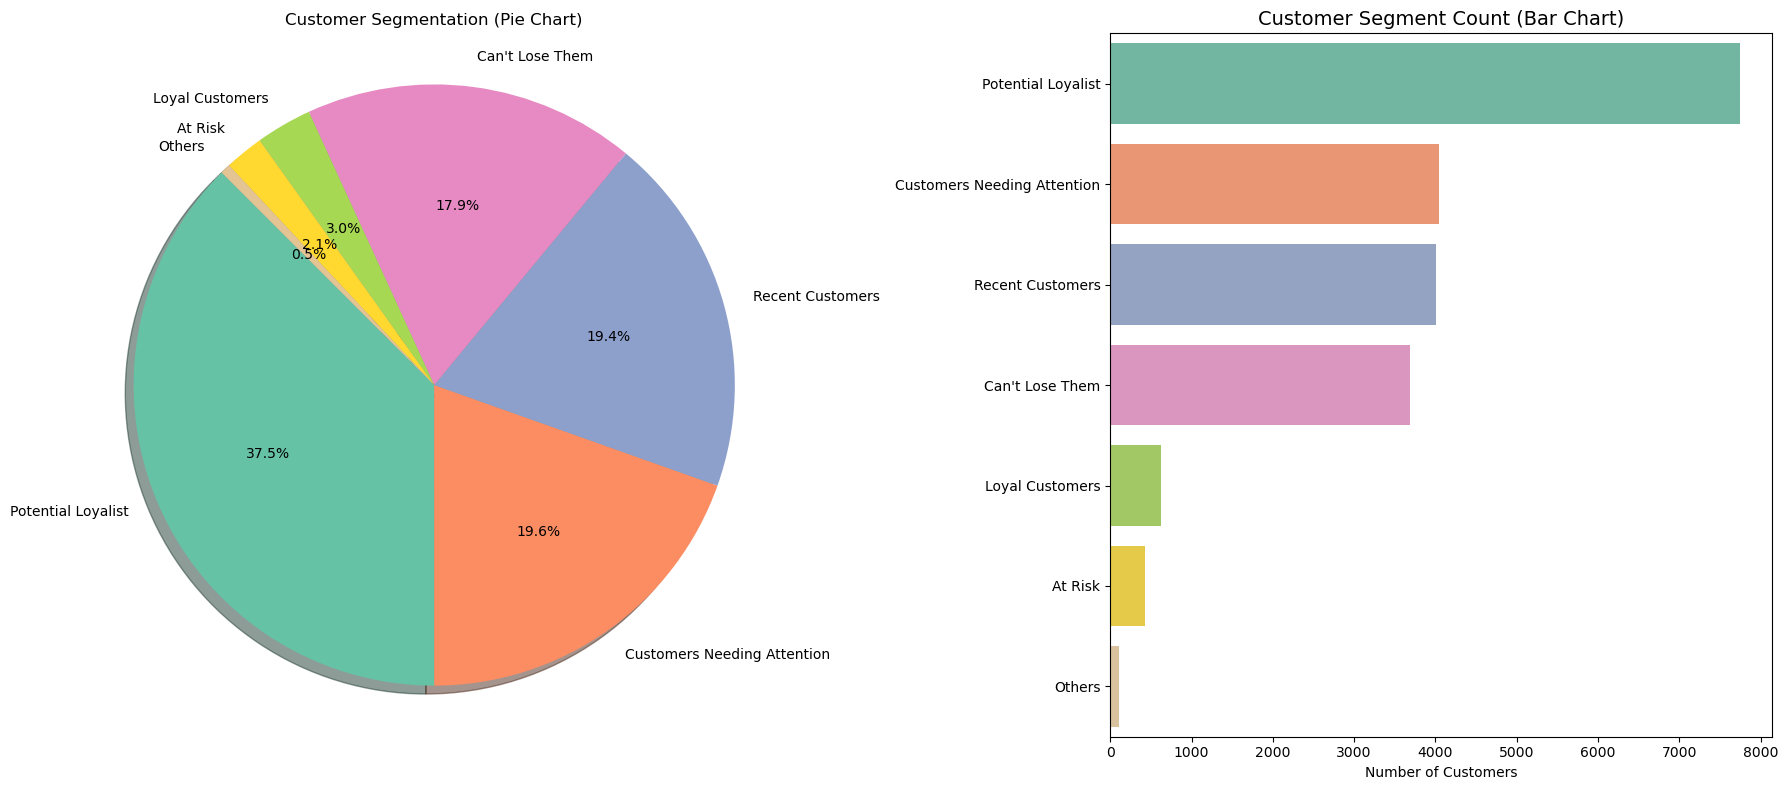

In [ ]:


# Prepare data
segment_counts = rfm['customer_segment'].value_counts()
labels = segment_counts.index
sizes = segment_counts.values

# Optional: Explode "Champions" or any other key segment
explode = [0.1 if label == 'Champions' else 0 for label in labels]
colors = sns.color_palette('Set2', len(labels))

# Create side-by-side plots
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# 🥧 Pie Chart
axes[0].pie(
    sizes,
    labels=labels,
    autopct='%.1f%%',
    startangle=135,
    explode=explode,
    shadow=True,
    colors=colors
)
axes[0].set_title("Customer Segmentation (Pie Chart)")
axes[0].axis('equal')  # Makes pie circular

# 📊 Bar Chart
sns.barplot(x=sizes, y=labels, ax=axes[1], palette=colors)
axes[1].set_title('Customer Segment Count (Bar Chart)', fontsize=14)
axes[1].set_xlabel('Number of Customers')
axes[1].set_ylabel('')
axes[1].tick_params(axis='y', labelsize=10)

plt.tight_layout()
plt.show()


### 📊 Customer Segmentation Overview

- The majority of customers fall into the **"Potential Loyalist"** segment (37.5%), indicating a large group that has shown recent activity but needs nurturing to become fully loyal.
- Segments such as **"Recent Customers" (19.4%)** and **"Customers Needing Attention" (19.6%)** also form key strategic targets — either for retention or re-engagement.
- **"Can't Lose Them" (17.9%)** represent high-frequency or high-spending users with increasing recency gaps, requiring immediate attention.
- A small but valuable portion belong to **"Loyal Customers" (3.0%)** and **"Champions"**, while **"At Risk"** and **"Lost"** customers present opportunities for win-back campaigns.


## KMeans Clustering

In [ ]:
from sklearn.preprocessing import StandardScaler

# Select RFM features
rfm_features = rfm[['recency', 'frequency', 'monetary']]

# Scale the data
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_features)

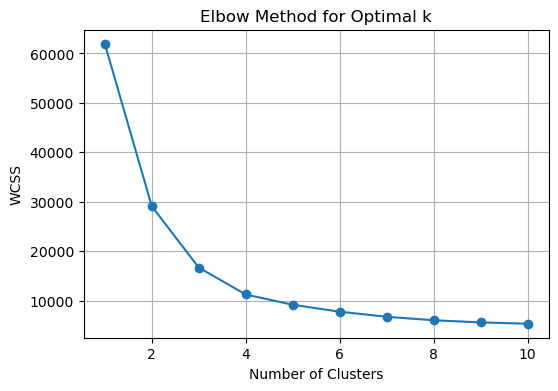

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(rfm_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(6, 4))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid()
plt.show()


### 📉 Elbow Method for Optimal k

- The elbow curve shows a steep decline in WCSS (Within-Cluster Sum of Squares) up to **k = 4**, after which the improvement levels off.
- Based on this inflection point, we selected **4 clusters** for KMeans, balancing between model complexity and segmentation quality.


In [ ]:
# Apply KMeans
optimal_k = 4  # change this based on elbow curve
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
rfm['kmeans_cluster'] = kmeans.fit_predict(rfm_scaled)


In [ ]:
rfm.groupby('kmeans_cluster').agg({
    'recency': 'mean',
    'frequency': 'mean',
    'monetary': 'mean',
    'customer_id': 'count'
}).rename(columns={'customer_id': 'num_customers'}).round(1)


,recency,frequency,monetary,num_customers
kmeans_cluster,,,,
0,239.5,7.3,4160.7,3330
1,69.6,1.1,301.1,8878
2,642.0,2.7,1365.8,2373
3,264.6,4.3,2188.3,6071


In [ ]:
# Assign cluster labels
cluster_map = {
    0: 'Loyal High-Value',
    1: 'New/Low-Value',
    2: 'Inactive Mid-Spenders',
    3: 'Engaged Mid-Value'
}
rfm['kmeans_segment'] = rfm['kmeans_cluster'].map(cluster_map)


In [ ]:
import plotly.express as px

fig = px.scatter_3d(
    rfm,
    x='recency',
    y='frequency',
    z='monetary',
    color='kmeans_segment',
    title='3D Customer Segmentation (RFM Clustering)',
    labels={'recency': 'Recency', 'frequency': 'Frequency', 'monetary': 'Monetary Value'},
    opacity=0.7
)

fig.update_layout(
    scene=dict(
        xaxis_title='Recency',
        yaxis_title='Frequency',
        zaxis_title='Monetary'
    ),
    legend_title_text='Customer Segment'
)

fig.show()



#### 🧭 1. 3D Scatter Plot – RFM Dimensions

The 3D plot displays customer clusters in their original **Recency, Frequency, and Monetary** space using Plotly.  
- It highlights how distinct clusters form naturally based on raw behavioral data.
- Customers with higher frequency and monetary value tend to cluster together, forming the **"Loyal High-Value"** group.
- Those with low engagement metrics are clearly separated into the **"New/Low-Value"** segment.

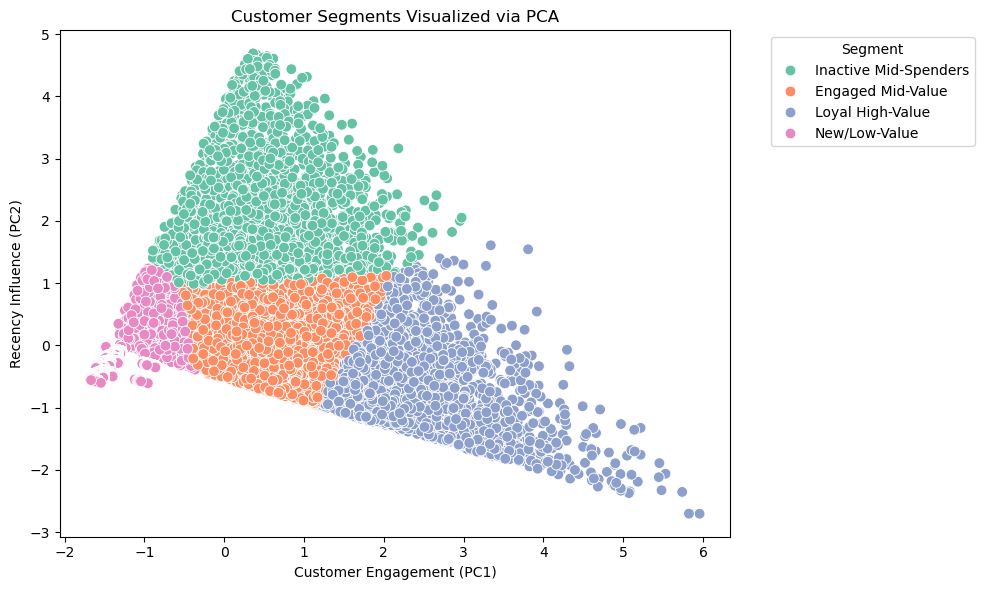

In [ ]:
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

# Apply PCA
pca = PCA(n_components=2)
pca_components = pca.fit_transform(rfm_scaled)

# Create a PCA dataframe
pca_df = pd.DataFrame(data=pca_components, columns=['PCA1', 'PCA2'])
pca_df['Segment'] = rfm['kmeans_segment']

# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x='PCA1', y='PCA2', hue='Segment', palette='Set2', s=60)
plt.title('Customer Segments Visualized via PCA')
plt.xlabel("Customer Engagement (PC1)")
plt.ylabel("Recency Influence (PC2)")
plt.legend(title='Segment', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


#### 🔍 2. 2D PCA Projection – Dimensionality Reduction

Using **Principal Component Analysis (PCA)**, the RFM feature space was reduced to 2 dimensions to allow for easier visual separation of clusters.  
- The PCA plot clearly shows four distinct clusters, supporting the chosen `k = 4` from the elbow method.
- Each group reflects a unique customer behavior profile (e.g., "Inactive Mid-Spenders" vs. "Engaged Mid-Value").
- This visualization validates that KMeans has effectively identified meaningful customer segments.

These plots together provide both **interpretability** (PCA) and **dimensional clarity** (3D RFM), helping stakeholders better understand customer distribution.

#### 🔍 PCA Interpretation:
- **Principal Component 1 (PC1)** represents overall customer engagement and value, driven by frequency and monetary features.
- **Principal Component 2 (PC2)** captures recency patterns, highlighting how recently customers interacted with the platform.
